# Saha code

Based on paper by [Seungtaek](https://iopscience.iop.org/article/10.1088/1361-6587/ac7ee8/pdf)

#### Ionization Potential Depression (from continuum lowering)
We assume some average ionization level $\bar{Z} \equiv n_e/n_0$ and also that the ionization is lower than 1 for simplicity.

In atomic units, we have 
$$
\Delta \chi = (\bar{Z} + 1)\sqrt{4 \pi \frac{\bar{Z} (\bar{Z}+1)n_0}{T_e}}
$$
Then the Saha equation is in the singly ionized limit is
$$
\frac{\bar{Z}^2 }{1-\bar{Z}} = \frac{2 g_1}{n_0 g_0} \left(\frac{m_e T_e}{2 \pi}\right)^{3/2} \exp \left[\beta (\chi_0 - \Delta \chi )\right].
$$
Where $g_0$ and $g_1$ are the degeneracy parameters for neutral and singly ionized species. 

#### Argon
For argon this is $g_0=1$, and $g_1\approx 6$, which comes from the fact that S=1/2, L=1, so J={1/2, 3/2}, giving 2 + 4 = 6 total states that are approximately degenerate.




In [90]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler


mpl.rcParams['lines.linewidth'] = 2.2
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.sans-serif'] = ['Arial', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana']
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = '#636363'
mpl.rcParams['grid.alpha'] = 0.12
mpl.rcParams['grid.linewidth'] = 0.7
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler('color',  ['#0AB34F', '#bf009f', '#00abc3', '#8e92c5', '#cc7014', '#e32851'])
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['figure.figsize'] = 8, 4.9443
mpl.rcParams['figure.dpi'] = 100

from constants import *

In [138]:
from scipy.optimize import root, least_squares

@np.vectorize
def Δχ_func(Zbar, n0, Te): # in AU 
    return np.min( [ (Zbar+1) * np.sqrt(4*π * Zbar*(Zbar+1)*n0/Te) , χ0_AU] )

def leftminusright_saha(Zbar, n0, Te):
    Δχ = Δχ_func(Zbar, n0, Te)
    left_hand_side = Zbar**2/(1 - Zbar) 
    right_hand_side = 2/n0 * g1/g0 * (m_e*Te/(2*π))**(3/2) * np.exp( -(χ0_AU - Δχ)/Te )
    return left_hand_side - right_hand_side

def leftminusrightsquare_saha(Zbar, n0, Te):
    Δχ = Δχ_func(Zbar, n0, Te)
    left_hand_side = Zbar**2/(1 - Zbar) 
    right_hand_side = 2/n0 * g1/g0 * (m_e*Te/(2*π))**(3/2) * np.exp( -(χ0_AU - Δχ)/Te )
    return (left_hand_side - right_hand_side)**2


@np.vectorize
def solve_Saha(Te, n0, Zbar_0=0.5):
    saha_LR = lambda Zbar: leftminusrightsquare_saha(Zbar, n0, Te)
    ε = 1e-2
    sol =  least_squares(saha_LR, Zbar_0, bounds=(0,1))
    print(sol.success)
    return sol.x, Δχ_func(sol.x, n0, Te), sol


## Argon

In [183]:
element='Ar'
g1 = 5.66 #6 
g0 = 1
χ0_eV = 15.8 # eV
χ0_AU = χ0_eV*eV_to_AU

n0_invcc = 2.53e21#6.3e26/1e6
n0_AU = n0_invcc*invcc_to_AU

# T_K_point = 10000#1
# Zbar_point, Δχ_point, sol = solve_Saha(T_K_point*K_to_AU, n0_AU)
# print(sol)
# print(f"At T = {T_K_point} [K], Zbar = {Zbar_point[0]:0.3f}, Δχ={Δχ_point[0]*AU_to_eV:0.3f} [eV]")


# array
T_K_array = np.geomspace(3e2, 2e4, num=100)
Zbar_Saha_1, Δχ_Saha_1, sols_1 = solve_Saha(T_K_array*K_to_AU, n0_AU, Zbar_0=0.05) 
Zbar_Saha_2, Δχ_Saha_2, sols_2 = solve_Saha(T_K_array*K_to_AU, n0_AU, Zbar_0=0.5) 
Zbar_Saha_3, Δχ_Saha_3, sols_3 = solve_Saha(T_K_array*K_to_AU, n0_AU, Zbar_0=0.95) 
# print(sols)


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


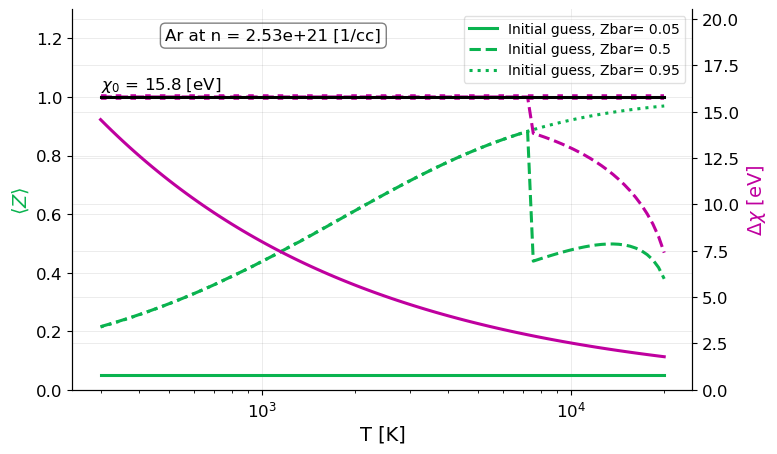

In [195]:
fig, ax = plt.subplots()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(T_K_array, Zbar_Saha_1,'-' , color=colors[0], label='Initial guess, Zbar= 0.05')
ax.plot(T_K_array, Zbar_Saha_2,'--', color=colors[0], label='Initial guess, Zbar= 0.5')
ax.plot(T_K_array, Zbar_Saha_3,':' , color=colors[0], label='Initial guess, Zbar= 0.95')


ax.set_ylabel(r"$\langle Z \rangle$",color=colors[0])
ax.set_xlabel("T [K]")
ax.set_xscale('log')

ax2 = ax.twinx()
# ax2.plot(T_K_array, Δχ_Saha*AU_to_eV,'--.',color=colors[1])
ax2.set_ylabel(r"$\Delta \chi$ [eV]",color=colors[1])
ax2.plot(T_K_array, Δχ_Saha_1*AU_to_eV,'-' ,color=colors[1])
ax2.plot(T_K_array, Δχ_Saha_2*AU_to_eV,'--',color=colors[1])
ax2.plot(T_K_array, Δχ_Saha_3*AU_to_eV,':' ,color=colors[1],linewidth=4)
ax2.plot(T_K_array, np.ones_like(T_K_array)*χ0_AU*AU_to_eV,'-' ,color='k')
ax2.text(300, 1.01*χ0_AU*AU_to_eV, r"$\chi_0$ = {0:0.1f} [eV]".format(χ0_AU*AU_to_eV), fontsize=12,
        verticalalignment='bottom')#, bbox=props)


props = dict(boxstyle='round', facecolor='white', alpha=0.5)
inset_text = f"{element} at n = {n0_invcc:0.2e} [1/cc]"
ax.text(0.15, 0.95, inset_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax.set_ylim(0,1.3)
ax2.set_ylim(0,1.3*χ0_AU*AU_to_eV)

ax.legend()

# ax.set_yscale('log')